In [43]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [25]:
df=pd.read_csv('/content/hanoi-aqi-weather-data.csv')
# Convert 'Local Time' column to datetime object
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Set 'Local Time' column as index
df.set_index('Local Time', inplace=True)

# Display the DataFrame
df

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00,2023-06-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,168.7,32.3,74.7,52.5,42.00,57.3,37,0.50,1004,87,29.3,0.0,1.33
2023-06-08 01:00:00,2023-06-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,115,169.8,32.0,66.0,51.3,41.00,64.0,50,1.00,1004,88,29.0,0.0,1.00
2023-06-08 02:00:00,2023-06-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,112,166.7,29.3,63.7,50.0,40.00,66.0,62,1.00,1003,89,28.9,0.0,0.66
2023-06-08 03:00:00,2023-06-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,121,163.6,26.7,61.3,53.8,43.00,68.0,75,0.50,1003,90,28.7,0.0,0.33
2023-06-08 04:00:00,2023-06-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,134,160.5,24.0,59.0,60.0,48.00,70.0,87,0.00,1003,92,28.6,0.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07 20:00:00,2024-06-07T13:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,67,968.9,21.7,27.3,35.4,20.09,4.0,70,1.00,1003,89,28.2,0.0,2.00
2024-06-07 21:00:00,2024-06-07T14:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,55,957.0,19.4,29.1,23.9,14.10,4.0,66,1.75,1004,92,27.5,0.0,2.00
2024-06-07 22:00:00,2024-06-07T15:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,49,1583.2,20.3,35.2,20.6,11.73,4.0,62,2.25,1004,95,26.7,0.0,2.00


In [26]:
df.drop(["UTC Time", "City", "Country Code", "Timezone"], axis=1, inplace=True)


In [27]:
# Define features and target
X = df.drop("PM25", axis=1)
y = df["PM25"]

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Train the XGBoost model
models = [XGBRegressor(),
         RandomForestRegressor(),
          LinearRegression()]

In [40]:
for model in models:

    start_time = time.time()

    # Train the model
    # Explicitly pass y_train to fit for all models
    model.fit(X_train, y_train)

    print(f"Time for fitting: {(time.time() - start_time)/60:.3f} minutes")

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    evs = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)*100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append evaluation metrics to the dataframe
    metrics_df = pd.concat([metrics_df, pd.DataFrame({"Model": [type(model).__name__],
                                                   "evs": [evs],
                                                   "mae": [mae],
                                                   "mape": [mape],
                                                   "rmse": [rmse],
                                                   "r^2 Score": [r2]})],
                           ignore_index=True)

Time for fitting: 0.004 minutes
Time for fitting: 0.062 minutes
Time for fitting: 0.001 minutes


In [41]:
#print the evaluation metrics
metrics_df

,Model,evs,mae,mape,rmse,r^2 Score
0,ExtraTreesRegressor,0.955179,5.027322,15.480475,10.600399,0.955140
1,RandomForestRegressor,0.976813,2.929817,9.012456,7.633809,0.976735
2,XGBRegressor,0.980404,1.393446,2.732823,7.011179,0.980376
3,RandomForestRegressor,0.983847,0.995571,2.258995,6.368749,0.983807
4,XGBRegressor,0.980404,1.393446,2.732823,7.011179,0.980376
5,RandomForestRegressor,0.983125,0.987434,2.337545,6.510773,0.983077
6,XGBRegressor,0.980404,1.393446,2.732823,7.011179,0.980376
7,RandomForestRegressor,0.983184,1.010172,2.297713,6.499372,0.983136
8,XGBRegressor,0.980404,1.393446,2.732823,7.011179,0.980376
9,RandomForestRegressor,0.983861,0.964769,2.213181,6.365286,0.983825


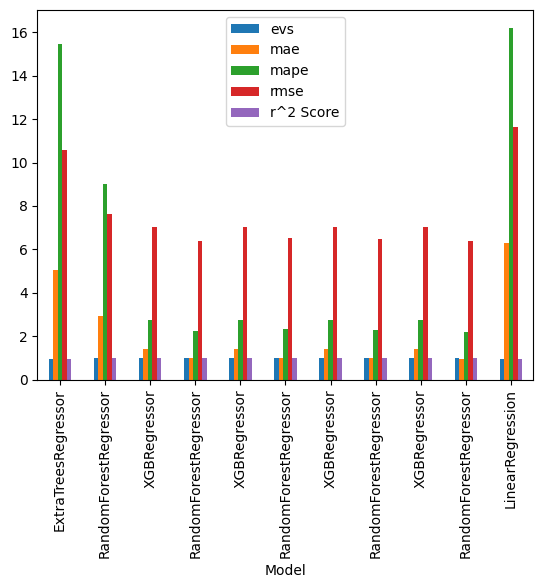

In [44]:
# Plot the evaluation metrics
metrics_df.plot(x="Model", y=["evs", "mae", "mape", "rmse", "r^2 Score"], kind="bar")
plt.show()